In [2]:
# Интервальные оценки для параметра биноминального закона.
# X_n - выборка из биноминального закона B(k, p), смоделированная в ЛР2;

# Лабораторная работа № 5 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

In [3]:
# 1. Для данных значений k, p и n смоделируйте выборку
# из биномиального закона распределения.

# Подключение библиотек:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Функция вычисления вероятности для каждой случайной величины:
def P_k(k, n=8, p=0.6):
    return math.comb(n, k) * (p) ** (k) * (1 - p) ** (n - k)

# Вектор случайной величины:
k_vector = list(range(9))

# Вектор распределения [Теоретическая плотность распределения]:
dist_vector = [round(P_k(x), 8) for x in k_vector]
dist_vector = pd.Series(dist_vector)

# Кумулятивный вектор [Теоретическая функция распределения]:
cumsum_vector = dist_vector.cumsum()
cumsum_vector = [round(x, 8) for x in cumsum_vector]

print("Вектор распределения:", *dist_vector, end='\n\n', sep='\n')
print("Вектор кумулятивных вероятностей:", *cumsum_vector, sep='\n')

Вектор распределения:
0.00065536
0.00786432
0.04128768
0.12386304
0.2322432
0.27869184
0.20901888
0.08957952
0.01679616

Вектор кумулятивных вероятностей:
0.00065536
0.00851968
0.04980736
0.1736704
0.4059136
0.68460544
0.89362432
0.98320384
1.0


In [4]:
# 2.1 Для полученной выборки постройте статистический ряд. Найдите
# эмпирическую функцию распределения 𝐹̂𝑛(𝑥).

# Определение посева:
np.random.seed(1)

# Создание выборки данных [data] по нашему распределению:
hist_data = []
data = [[] for i in range(len(cumsum_vector))]

for random_number in range(180):
    number = np.random.uniform(0, 1)
    for choose in range(len(cumsum_vector)):
        if number < cumsum_vector[choose]:
            data[choose].append(number)
            hist_data.append(number)
            break

# Частотный ряд:

# [Если каждое из значений поделить на размер выборки - получится Э.П.Р.]
len_data = [len(x) for x in data]

# Формирование вариационного ряда, эксперементальных данных:
events, data_x = [], []
for xi in enumerate(len_data):
    events.append([xi[0] for i in range(xi[1])])

print("Получившаяся выборка данных:\n", *events, sep='\n')
k = sum([sum(x) for x in events])

for i in range(len(events)):
    for j in range(len(events[i])):
       data_x.append(events[i][j])

# Накопленные частоты [Эмпирическая функция распрделения]:
cumulative_data_vector = [round(sum([len_data[x] / 180 for x in range(i + 1)]),
                                8) for i in range(len(len_data))]

# Вывод статистического ряда:
print("\nСтатистический ряд для экспериментальных данных:\n")
for xi in range(len(len_data)):
    print(f"Случайная величина {xi}\nЧастота: {round(len_data[xi] / 180, 5)}\nНакопленная частота: {cumulative_data_vector[xi]}\n")

print("Выборочное среднее:", k / 180)
print("Статистика K(X_n):", k)

Получившаяся выборка данных:

[0]
[1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8]

Статистический ряд для экспериментальных данных:

Случайная величина 0
Частота: 0.00556
Накопленная частота: 0.00555556

Случайная величина 1
Частота: 0.00556
Накопленная частота: 0.01111111

Случайная величина 2
Частота: 0.06667
Накопленная частота: 0.07777778

Случайная величина 3
Частота: 0.16111
Накопленная частота: 0.23888889

Случайная величина 4
Частота: 0.18333
Накопленная частота: 0.42222222

Случайная велич

Приближенные значения вероятностей: p_1 = 0.609304652326163, p_2 = 0.5657828914457228



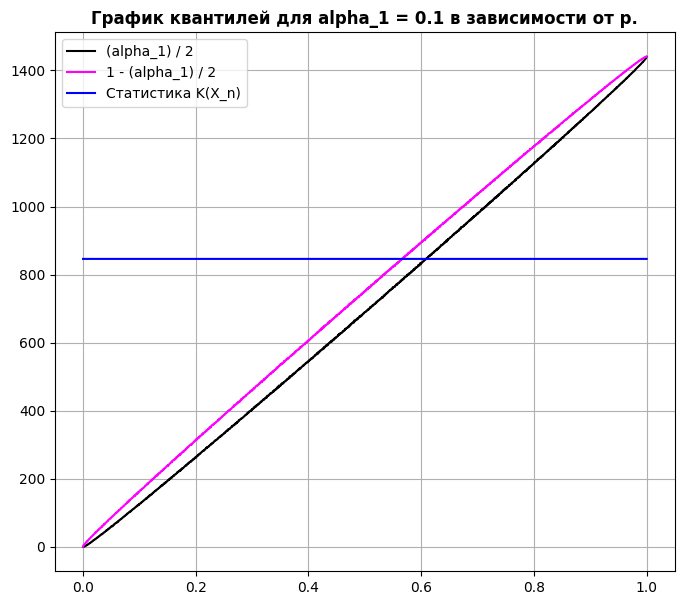

In [5]:
# 1. Приближенные доверительные интервалы для 𝑝 с
# использованием метода Клоппера-Пирсона;

alpha_1, alpha_2, alpha_3 = 1 - 0.9, 1 - 0.95, 1 - 0.98

# Посев данных:
np.random.seed(40)

# alpha_1:
p = np.linspace(start = 0, stop = 1, num = 2000)
C_1_alpha_1 = [np.quantile(np.random.binomial(8 * 180, p_x, 2000),
                           alpha_1 / 2) for p_x in p]
C_2_alpha_1 = [np.quantile(np.random.binomial(8 * 180, p_x, 2000),
                           1 - (alpha_1 / 2)) for p_x in p]


# Индексы вектора вероятностей, в которых происходит
# пересечение со статистикой K(X_n):
ind1 = C_1_alpha_1.index(846)
ind2 = C_2_alpha_1.index(846)

k_p1 = p[ind1]
k_p2 = p[ind2]

print(f"Приближенные значения вероятностей: p_1 = {p[ind1]}, p_2 = {p[ind2]}\n")

# Построение графика:
plt.figure(figsize=(8,7))
plt.grid()

plt.plot(p,
         C_1_alpha_1,
         label = '(alpha_1) / 2',
         color = 'black')

plt.plot(p,
         C_2_alpha_1,
         label = '1 - (alpha_1) / 2',
         color = 'magenta')

plt.plot(p,
         np.repeat(k, 2000),
         color = 'blue',
         label = 'Статистика K(X_n)')

plt.title("График квантилей для alpha_1 = 0.1 в зависимости от p.",
          fontweight='bold')
plt.legend(loc = 'upper left')
plt.show()

Приближенные значения вероятностей (alpha_2): p_1 = 0.6128064032016007, p_2 = 0.5617808904452226



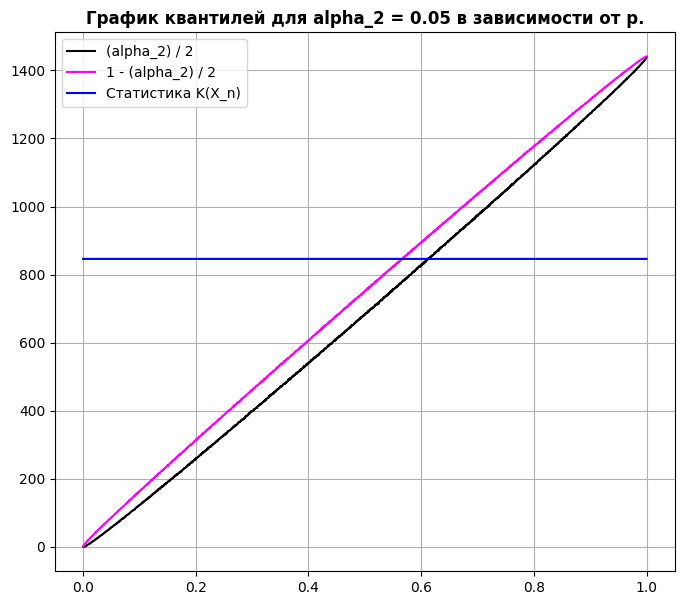

In [6]:
# Посев данных:
np.random.seed(10)

# alpha_2:
p = np.linspace(start = 0, stop = 1, num = 2000)
C_1_alpha_2 = [np.quantile(np.random.binomial(8 * 180, p_x, 2000),
                           alpha_2 / 2) for p_x in p]
C_2_alpha_2 = [np.quantile(np.random.binomial(8 * 180, p_x, 2000),
                           1 - (alpha_2 / 2)) for p_x in p]


# Индексы вектора вероятностей, в которых происходит
# пересечение со статистикой K(X_n):
ind1 = C_1_alpha_2.index(846)
ind2 = C_2_alpha_2.index(846)

print(f"Приближенные значения вероятностей (alpha_2): p_1 = {p[ind1]}, p_2 = {p[ind2]}\n")

# Построение графика:
plt.figure(figsize=(8,7))
plt.grid()

plt.plot(p,
         C_1_alpha_2,
         label = '(alpha_2) / 2',
         color = 'black')

plt.plot(p,
         C_2_alpha_1,
         label = '1 - (alpha_2) / 2',
         color = 'magenta')

plt.plot(p,
         np.repeat(k, 2000),
         color = 'blue',
         label = 'Статистика K(X_n)')

plt.title("График квантилей для alpha_2 = 0.05 в зависимости от p.",
          fontweight='bold')
plt.legend(loc = 'upper left')
plt.show()

Приближенные значения вероятностей (alpha_3): p_1 = 0.6148074037018508, p_2 = 0.5557778889444722



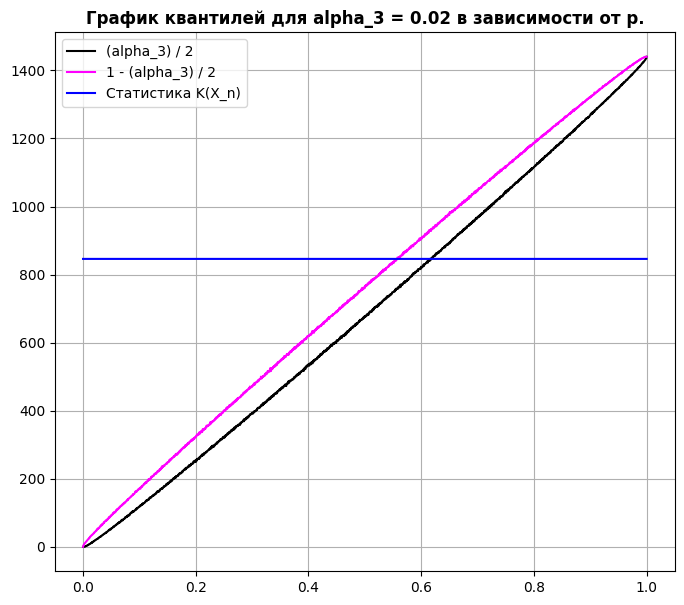

In [7]:
# Посев данных:
np.random.seed(20)

# alpha_3:
p = np.linspace(start = 0, stop = 1, num = 2000)
C_1_alpha_3 = [np.quantile(np.random.binomial(8 * 180, p_x, 2000),
                           alpha_3 / 2) for p_x in p]
C_2_alpha_3 = [np.quantile(np.random.binomial(8 * 180, p_x, 2000),
                           1 - (alpha_3 / 2)) for p_x in p]

# Индексы вектора вероятностей, в которых происходит
# пересечение со статистикой K(X_n):
ind1 = C_1_alpha_3.index(846)
ind2 = C_2_alpha_3.index(845)

print(f"Приближенные значения вероятностей (alpha_3): p_1 = {p[ind1]}, p_2 = {p[ind2]}\n")

# Построение графика:
plt.figure(figsize=(8,7))
plt.grid()

plt.plot(p,
         C_1_alpha_3,
         label = '(alpha_3) / 2',
         color = 'black')

plt.plot(p,
         C_2_alpha_3,
         label = '1 - (alpha_3) / 2',
         color = 'magenta')

plt.plot(p,
         np.repeat(k, 2000),
         color = 'blue',
         label = 'Статистика K(X_n)')

plt.title("График квантилей для alpha_3 = 0.02 в зависимости от p.",
          fontweight='bold')
plt.legend(loc='upper left')
plt.show()

In [8]:
# 2. Приближенные доверительные интервалы для 𝑝 с
# использованием ЦПТ;

def q_snd(alpha):
    return np.quantile(np.random.normal(loc=0.0, scale=1.0, size=180), alpha)

def probability_cpt(alpha, n=180, k=8, K=846, x_mu = 4.7):
    left = (x_mu / k) + ((q_snd(alpha / 2) / (k * (n * k) ** (1/2))) * (x_mu * (k - x_mu)) ** (1/2))
    right = (x_mu / k) + ((q_snd(1 - alpha / 2) / (k * (n * k) ** (1/2))) * (x_mu * (k - x_mu)) ** (1/2))
    return [left, right]

print(f"Приближенные значения вероятностей (alpha_1): p_1 = {probability_cpt(alpha_1)[0]}, p_2 = {probability_cpt(alpha_1)[1]}")
print(f"Приближенные значения вероятностей (alpha_2): p_1 = {probability_cpt(alpha_2)[0]}, p_2 = {probability_cpt(alpha_2)[1]}")
print(f"Приближенные значения вероятностей (alpha_3): p_1 = {probability_cpt(alpha_3)[0]}, p_2 = {probability_cpt(alpha_3)[1]}")

Приближенные значения вероятностей (alpha_1): p_1 = 0.5711352242632876, p_2 = 0.6085592261238854
Приближенные значения вероятностей (alpha_2): p_1 = 0.5612725489830721, p_2 = 0.6154210041169987
Приближенные значения вероятностей (alpha_3): p_1 = 0.5618732048393762, p_2 = 0.6181239391870897


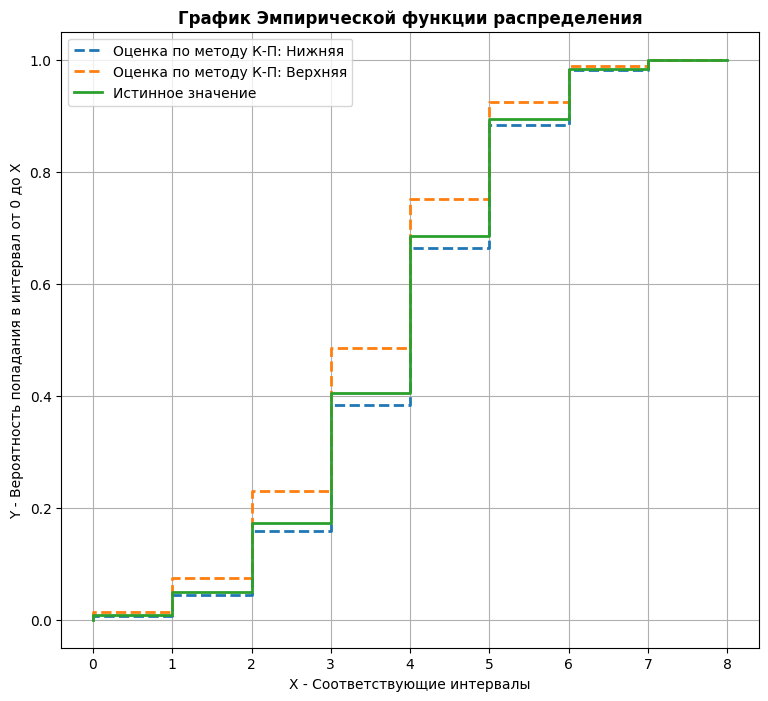

In [12]:
# Графики функции распределения для истинного значения параметра 𝑝 и граничных
# значений доверительного интервала для уровня доверия 1 − 𝛼 = 0.9:

# Функция вычисления вероятности для каждой случайной величины:
def P_k(k, p, n=8):
    return math.comb(n, k) * (p) ** (k) * (1 - p) ** (n - k)

# Данные для построение графика:
def data_output(p):
    k_vector = list(range(9))
    dist_vector = [round(P_k(x, p), 8) for x in k_vector]
    dist_vector = pd.Series(dist_vector)
    cumsum_vector = dist_vector.cumsum()
    cumsum_vector = [round(x, 8) for x in cumsum_vector]
    return [k_vector, cumsum_vector]

# Построение графиков по истинной вероятности и доверительных вероятностей по методу Клоппера-Пирсона:

plt.figure(figsize=(9,8))
plt.step(data_output(k_p1)[0],
         data_output(k_p1)[1],
         where='pre',
         linewidth=2,
         linestyle='dashed',
         label="Оценка по методу К-П: Нижняя")

plt.step(data_output(k_p2)[0],
         data_output(k_p2)[1],
         where='pre',
         linewidth=2,
         linestyle='dashed',
         label="Оценка по методу К-П: Верхняя")

plt.step(data_output(0.6)[0],
         data_output(0.6)[1],
         where='pre',
         linewidth=2,
         label="Истинное значение")

plt.grid()
plt.title("График Эмпирической функции распределения", fontweight = 'bold')
plt.legend(loc="upper left")
plt.xlabel('X - Соответствующие интервалы')
plt.ylabel('Y - Вероятность попадания в интервал от 0 до X')
plt.show()



# Вывод:

# Истинное значение р=0.6, при всех трех способах вычисления оценок оно оказывается
# внутри построенного доверительного интервала.

# Как можно видеть, график функции, соответствующий истинному значению параметра
# p заключен между графиками, соответствующими верхней и нижней границам доверительного интервал